In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [2]:
en = pd.read_csv("../../../Data/min_importances/en_importances.csv", encoding="latin1")
lr = pd.read_csv("../../../Data/min_importances/lr_importances.csv", encoding="latin1")
gb = pd.read_csv("../../../Data/min_importances/gb_importances.csv", encoding="latin1")
rf = pd.read_csv("../../../Data/min_importances/rf_importances.csv", encoding="latin1")
dfs = [lr,en, gb, rf]

In [4]:
lr

,Columns,Importances,Absolute_Importances,Percentage_Importance
0,Created_on_Weekend,-35.791730,35.791730,0.838464
1,Cases_created_within_past_8_hours,-1.668117,1.668117,0.039078
2,Concurrent_open_cases,-1.653791,1.653791,0.038742
3,Seconds_left_Month,-1.373364,1.373364,0.032173
4,Seconds_left_Qtr,-1.320948,1.320948,0.030945
5,Seconds_left_Day,-0.879329,0.879329,0.020599


In [28]:
rf

,Columns,Importances
0,Concurrent_open_cases,0.986629
1,Seconds_left_Qtr,0.010437
2,Cases_created_within_past_8_hours,0.002412
3,Seconds_left_Month,0.000522
4,Created_on_Weekend,0.000000
5,Seconds_left_Day,0.000000


In [3]:
dfs_sorted = []
for df in dfs:
    dfs_sorted.append(df.sort_values("Columns"))

In [45]:
dfs_sorted[3]

,Columns,Importances
2,Cases_created_within_past_8_hours,0.002412
0,Concurrent_open_cases,0.986629
4,Created_on_Weekend,0.000000
5,Seconds_left_Day,0.000000
3,Seconds_left_Month,0.000522
1,Seconds_left_Qtr,0.010437


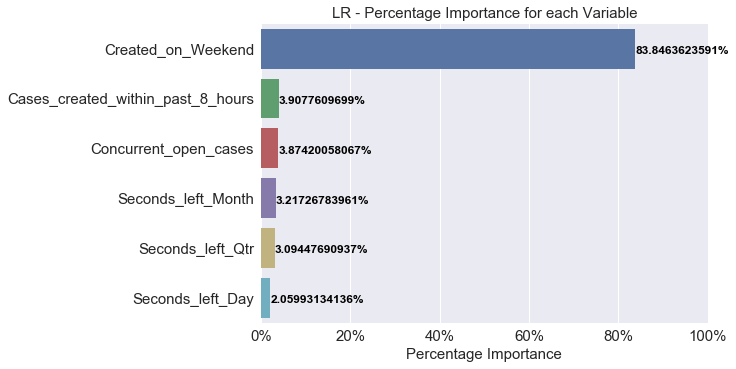

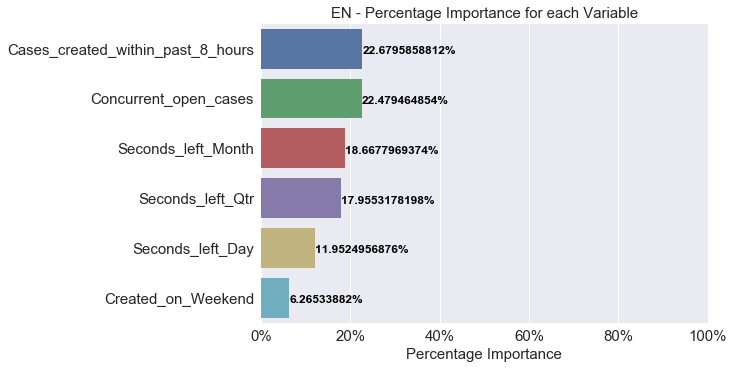

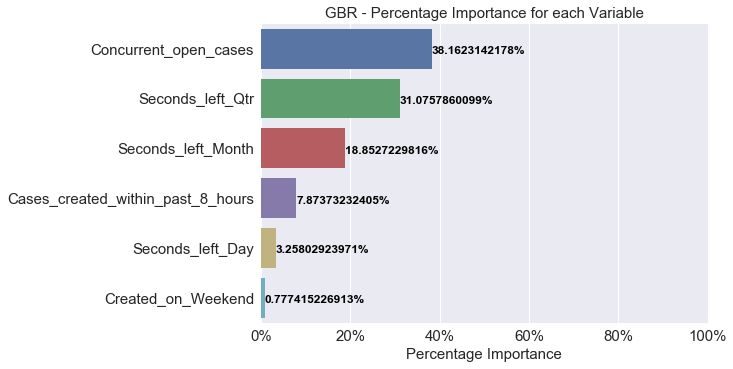

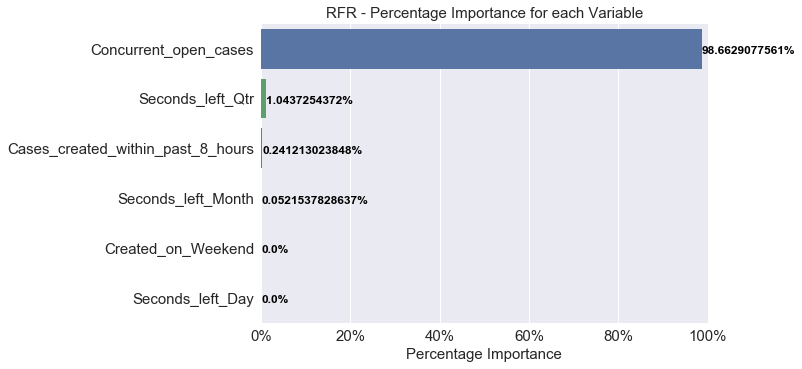

In [27]:
titles = ["LR", "EN", "GBR", "RFR"]
x = "Percentage_Importance"
itera=0

for df, title in zip(dfs, titles):
    fig, ax = plt.subplots() #(figsize=(10, 6))
    
    sns.barplot(x=x, y="Columns", data=df) #, order=df["Columns"].values)
    plt.title(title + " - Percentage Importance for each Variable", fontsize=15)
    plt.xlabel("Percentage Importance", fontsize=15)
    plt.ylabel("", fontsize=0)
    
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x))) 
    
    for i, v in enumerate(df[x].values):
        pct_v = v*100
        ax.text(v, i+0.1, "%s%%"%pct_v, color='Black', fontweight='bold')#, fontsize=15)
    
    plt.xlim(0,1)
    
    # We change the fontsize of minor ticks label 
    plt.tick_params(axis='both', which='major', labelsize=15)
    
    plt.savefig("../../../Data/min_importances/plots/%s_pct_for_each_var"%(title), bbox_inches='tight')
    plt.show()
    itera+=1
    if itera>1:
        x= "Importances"